<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/IIIT-A Internship/heart_failure_clinical_records.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [5]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred_1 = logr.predict(X_test)

In [8]:
from sklearn.metrics import *
print("Accuracy : ", accuracy_score(y_test, y_pred_1)*100)

Accuracy :  83.73333333333333


In [9]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1037
           1       0.77      0.68      0.72       463

    accuracy                           0.84      1500
   macro avg       0.82      0.79      0.80      1500
weighted avg       0.83      0.84      0.83      1500



In [10]:
confusion_matrix(y_test, y_pred_1)

array([[943,  94],
       [150, 313]])

<Axes: >

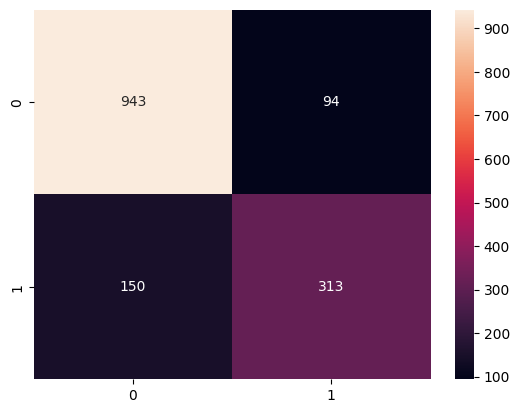

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True, fmt='g')

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred_2 = dt.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1037
           1       0.99      0.98      0.99       463

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [15]:
print("Accuracy", accuracy_score(y_test, y_pred_2)*100, "%")

Accuracy 99.26666666666667 %


In [16]:
confusion_matrix(y_test, y_pred_2)

array([[1034,    3],
       [   8,  455]])

<Axes: >

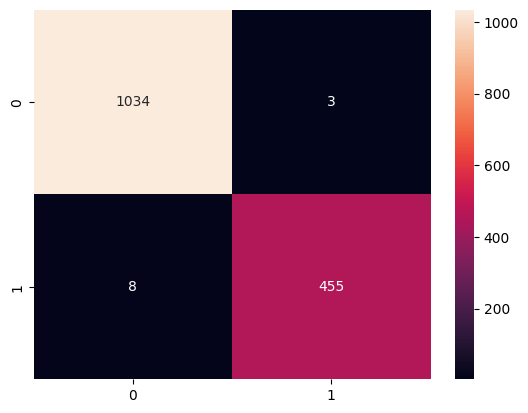

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, fmt='g')

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [19]:
y_pred_3 = rf.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1037
           1       1.00      0.98      0.99       463

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [21]:
print("Accuracy: ", accuracy_score(y_test, y_pred_3)*100,"%")

Accuracy:  99.26666666666667 %


In [22]:
confM = confusion_matrix(y_test, y_pred_3)
confM

array([[1037,    0],
       [  11,  452]])

<Axes: >

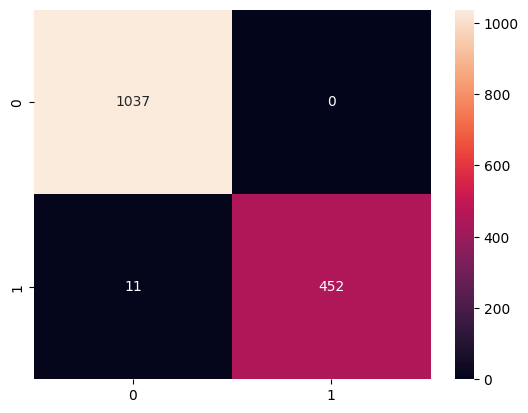

In [23]:
sns.heatmap(confM, annot=True, fmt='d')

# K-NN Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred_4 = knn.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1037
           1       0.90      0.94      0.92       463

    accuracy                           0.95      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.95      0.95      0.95      1500



In [27]:
accuracy_score(y_test, y_pred_4)*100

95.0

In [28]:
confusion_matrix(y_test, y_pred_4)

array([[991,  46],
       [ 29, 434]])

<Axes: >

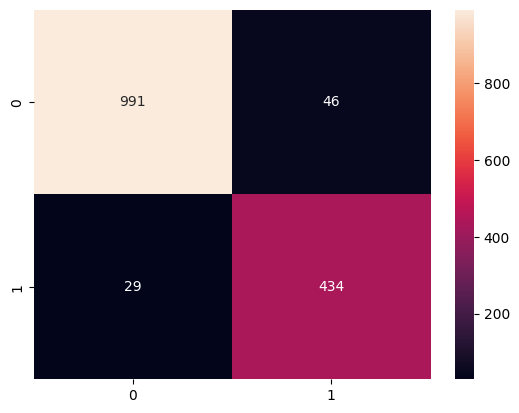

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, fmt='g')

# SVM Classifier

In [33]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
y_pred_5 = svc.predict(X_test)
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1037
           1       0.76      0.63      0.69       463

    accuracy                           0.82      1500
   macro avg       0.80      0.77      0.78      1500
weighted avg       0.82      0.82      0.82      1500

